In [1]:
import keras
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense,Flatten
from keras.layers import Conv2D,MaxPooling2D
from keras.datasets import mnist
from keras import optimizers
from keras.callbacks import Callback, CSVLogger
#import tensorflow as tf
#config = tf.ConfigProto()
#config.gpu_options.allow_growth = True
#tf.keras.backend.set_session(tf.Session(config=config))

(x_train,y_train),(x_test,y_test) = mnist.load_data()
x_train = x_train.reshape(x_train.shape[0],28,28,1)/255
x_test = x_test.reshape(x_test.shape[0],28,28,1)/255

y_train = keras.utils.to_categorical(y_train,10)
y_test = keras.utils.to_categorical(y_test,10)

print(x_train.shape)
print(x_test.shape)

11493376/11490434 [==============================] - 1s 0us/step
(60000, 28, 28, 1)
(10000, 28, 28, 1)


In [8]:
############Please set as you like############
batch_size = 128
epochs = 50
learning_rate = 0.01

loss = "mean_squared_error"
optimizer = optimizers.Adam(lr = learning_rate)

csv_create_path = './keras_cnn_trainlog.csv'
loss_figure_save_path = './keras_cnn_loss.jpg'
acc_figure_save_path = './keras_cnn_acc.jpg'
##############################################

In [9]:
model = Sequential()
model.add(Conv2D(10,kernel_size = (5,5),activation = "relu",input_shape = (28,28,1)))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Conv2D(20,(5,5),activation = "relu"))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Flatten())
model.add(Dense(units = 100,activation = "relu"))
model.add(Dense(units = 10,activation = "softmax"))

model.compile(loss = loss,
              optimizer = optimizer,
              metrics = ["accuracy"])

model.summary()

csv_logger = CSVLogger(csv_create_path)

history = model.fit(x_train,y_train,
                    epochs = epochs,
                    batch_size = batch_size,
                    verbose = 1,
                    validation_data = (x_test,y_test),
                    callbacks=[csv_logger])

score = model.evaluate(x_test,y_test,verbose = 1)
print("test loss:",score[0])
print("test accuracy:",score[1])

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 24, 24, 10)        260       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 12, 12, 10)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 8, 8, 20)          5020      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 4, 4, 20)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 320)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 100)               32100     
_________________________________________________________________
dense_3 (Dense)              (None, 10)               

469/469 [==============================] - 9s 19ms/step - loss: 0.0229 - accuracy: 0.8853 - val_loss: 0.0296 - val_accuracy: 0.8522
Epoch 50/50
313/313 [==============================] - 1s 3ms/step - loss: 0.0291 - accuracy: 0.8545
test loss: 0.02909036912024021
test accuracy: 0.8544999957084656


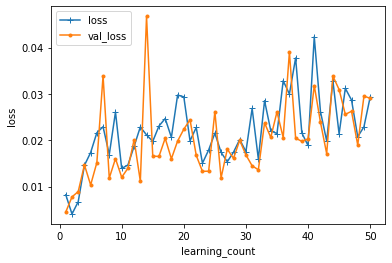

In [10]:
loss = history.history["loss"]
val_loss = history.history["val_loss"]

learning_count = len(loss)+1

plt.plot(range(1,learning_count),loss,marker = "+",label = "loss")
plt.plot(range(1,learning_count),val_loss,marker = ".",label = "val_loss")
plt.legend(loc = "best",fontsize = 10)
plt.xlabel("learning_count")
plt.ylabel("loss")
plt.savefig(loss_figure_save_path)

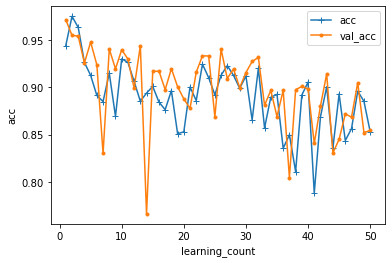

In [11]:
loss = history.history["accuracy"]
val_loss = history.history["val_accuracy"]

learning_count = len(loss)+1

plt.plot(range(1,learning_count),loss,marker = "+",label = "acc")
plt.plot(range(1,learning_count),val_loss,marker = ".",label = "val_acc")
plt.legend(loc = "best",fontsize = 10)
plt.xlabel("learning_count")
plt.ylabel("acc")
plt.savefig(acc_figure_save_path)